In [9]:
# materials
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_parquet('data/raw/data_v1.parquet')

In [10]:
data.dtypes

quarter          datetime64[ns]
quarter_label            object
ig_maus                   int64
ig_revenue                int64
tk_maus                   int64
tk_revenue                int64
dtype: object

In [11]:
data.head()

,quarter,quarter_label,ig_maus,ig_revenue,tk_maus,tk_revenue
0,2019-01-01,Q1 2019,1160000000,3255000000,333000000,56000000
1,2019-04-01,Q2 2019,1210000000,3887000000,381000000,65000000
2,2019-07-01,Q3 2019,1255000000,4066000000,439000000,82000000
3,2019-10-01,Q4 2019,1300000000,5016000000,508000000,167000000
4,2020-01-01,Q1 2020,1365000000,4475000000,583000000,347000000


In [12]:
data.shape

(21, 6)

<Axes: >

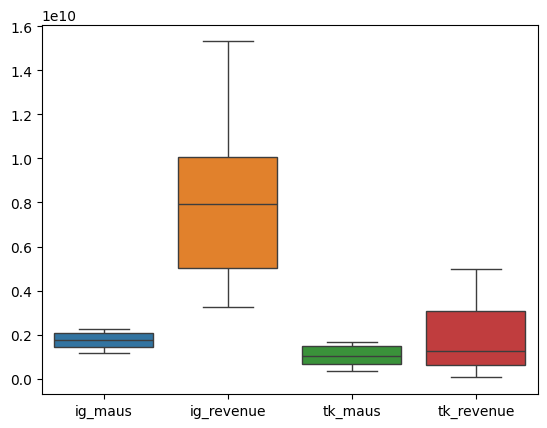

In [13]:
# boxplot
sns.boxplot(data)

In [14]:
# describe
data.describe()

,quarter,ig_maus,ig_revenue,tk_maus,tk_revenue
count,21,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01
mean,2021-07-01 10:17:08.571428608,1.732429e+09,8.162810e+09,1.038190e+09,1.819143e+09
min,2019-01-01 00:00:00,1.160000e+09,3.255000e+09,3.330000e+08,5.600000e+07
25%,2020-04-01 00:00:00,1.435000e+09,5.016000e+09,6.670000e+08,6.380000e+08
50%,2021-07-01 00:00:00,1.765000e+09,7.919000e+09,1.015000e+09,1.239000e+09
75%,2022-10-01 00:00:00,2.050000e+09,1.005400e+10,1.501000e+09,3.050000e+09
max,2024-01-01 00:00:00,2.231000e+09,1.532200e+10,1.666000e+09,4.997000e+09
std,NaN,3.538734e+08,3.488508e+09,4.663554e+08,1.593180e+09


<Axes: xlabel='quarter', ylabel='ig_revenue'>

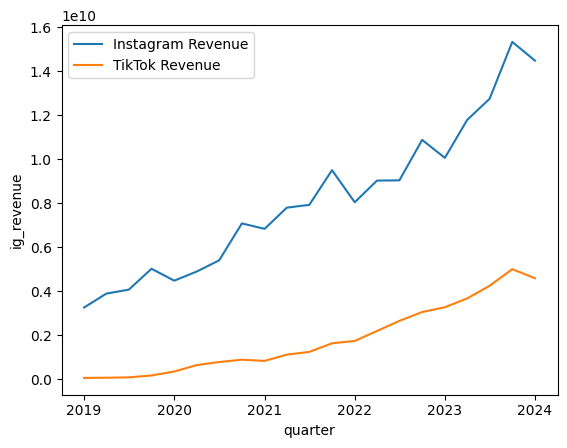

In [15]:
# lineplot revenues
sns.lineplot(data=data, x='quarter', y='ig_revenue', label='Instagram Revenue')
sns.lineplot(data=data, x='quarter', y='tk_revenue', label='TikTok Revenue')

<Axes: xlabel='quarter', ylabel='ig_revenue'>

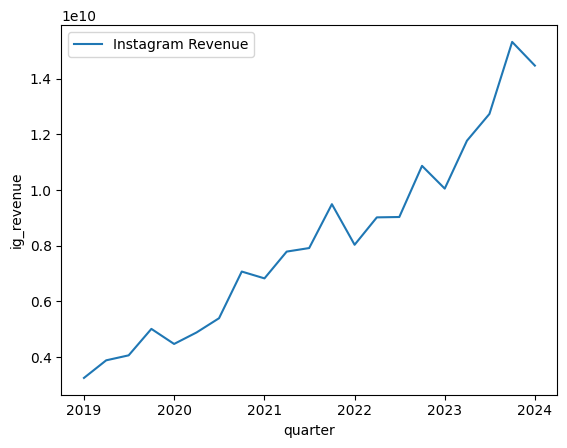

In [16]:
sns.lineplot(data=data, x='quarter', y='ig_revenue', label='Instagram Revenue')

<Axes: xlabel='quarter', ylabel='tk_revenue'>

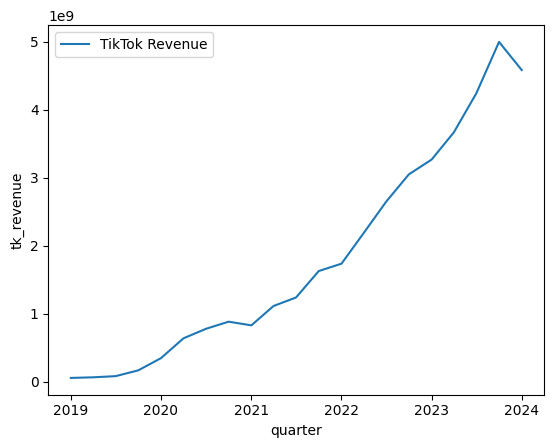

In [17]:
sns.lineplot(data=data, x='quarter', y='tk_revenue', label='TikTok Revenue')

<Axes: xlabel='quarter', ylabel='ig_maus'>

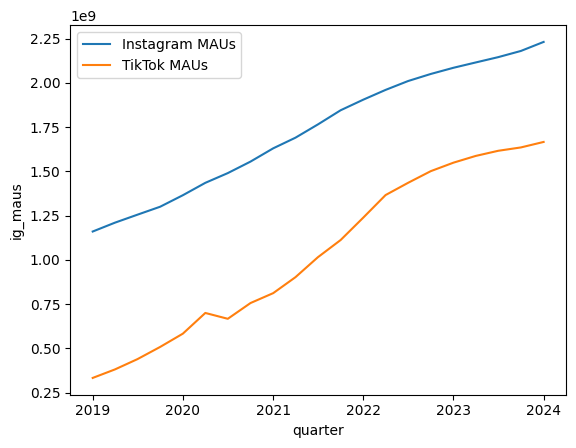

In [18]:
# lineplot MAUs
sns.lineplot(data=data, x='quarter', y='ig_maus', label='Instagram MAUs')
sns.lineplot(data=data, x='quarter', y='tk_maus', label='TikTok MAUs')

<Axes: xlabel='quarter', ylabel='ig_maus'>

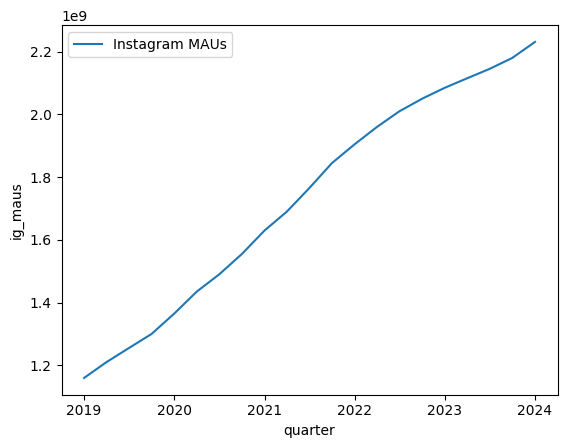

In [19]:
sns.lineplot(data=data, x='quarter', y='ig_maus', label='Instagram MAUs')

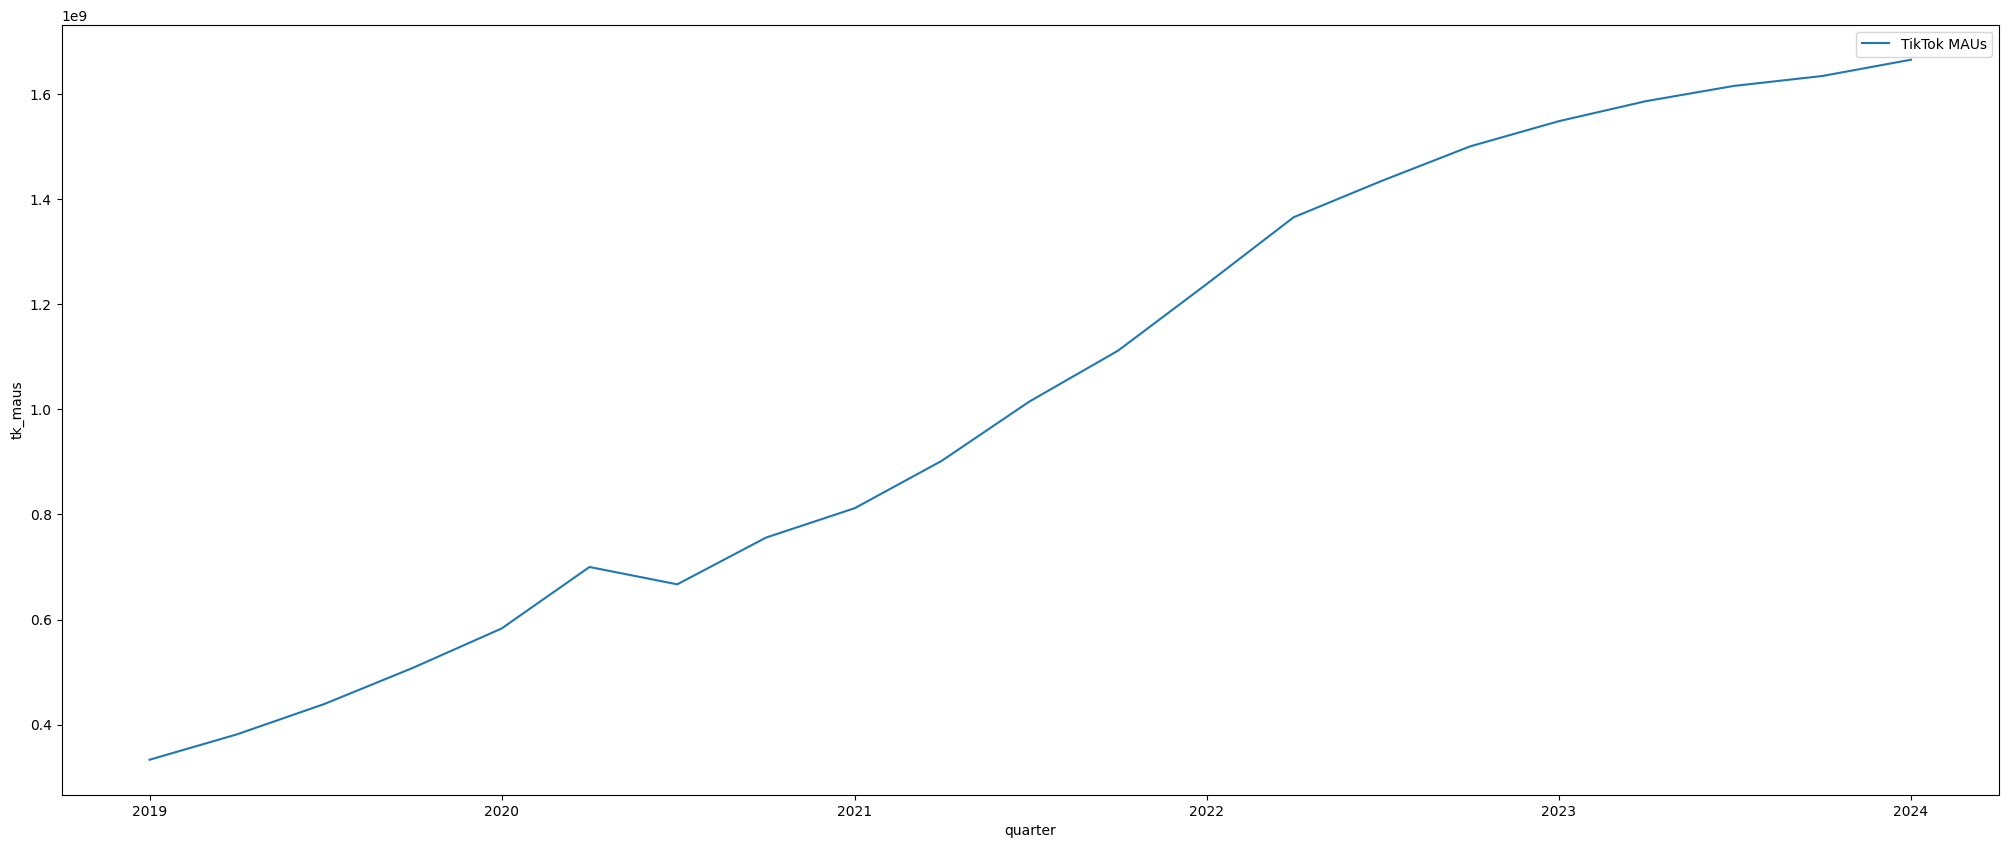

In [20]:
fig = plt.figure(figsize=(25, 10))
sns.lineplot(data=data, x='quarter', y='tk_maus', label='TikTok MAUs')
plt.show()

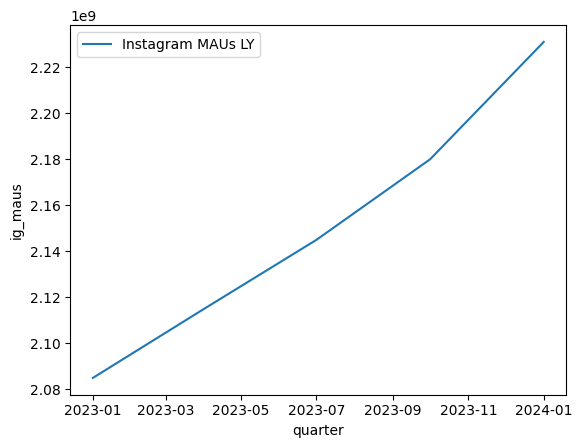

In [21]:
# lineplot last year revenues and MAUs (instagram)
data_ly = data.copy()
data_ly = data_ly.tail(5)

# sns.lineplot(data=data_ly, x='quarter', y='ig_revenue', label='Instagram Revenue LY')
sns.lineplot(data=data_ly, x='quarter', y='ig_maus', label='Instagram MAUs LY')

del data_ly

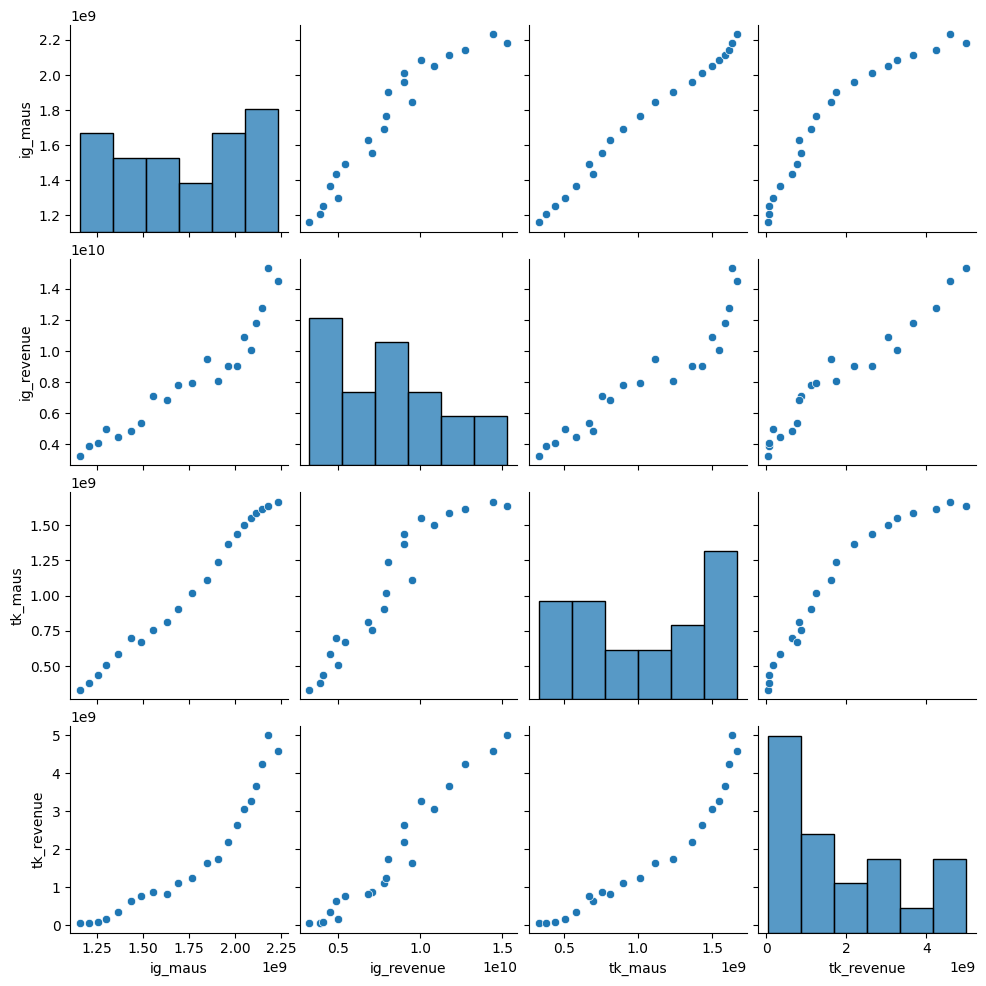

In [22]:
# pairplot
sns.pairplot(data)

<Axes: >

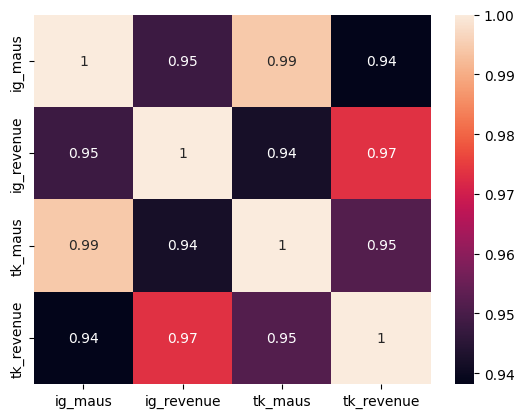

In [23]:
# heatmap
numeric_data = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(), annot=True)


<Axes: xlabel='tk_maus', ylabel='tk_revenue'>

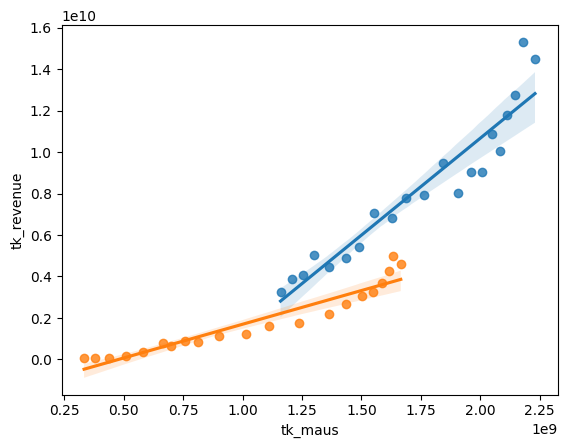

In [24]:
# regplot
sns.regplot(data=data, x='ig_maus', y='ig_revenue', label='Instagram')
sns.regplot(data=data, x='tk_maus', y='tk_revenue', label='TikTok')

## Presupostos

In [25]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [26]:
# 1. Avaliação dos Pressupostos
def evaluate_assumptions(data):
    # Verificando a estacionariedade com o teste de Dickey-Fuller Aumentado
    result = adfuller(data['ig_maus'])
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

    if result[1] < 0.05:
        print("A série é estacionária")
    else:
        print("A série não é estacionária. Considere diferenciação ou transformação.")

    # Plotando ACF e PACF para avaliar autocorrelação
    plot_acf(data['ig_maus'])
    plt.show()
    plot_pacf(data['ig_maus'])
    plt.show()

ADF Statistic: 0.4823236847014844
p-value: 0.9843258203818094
A série não é estacionária. Considere diferenciação ou transformação.


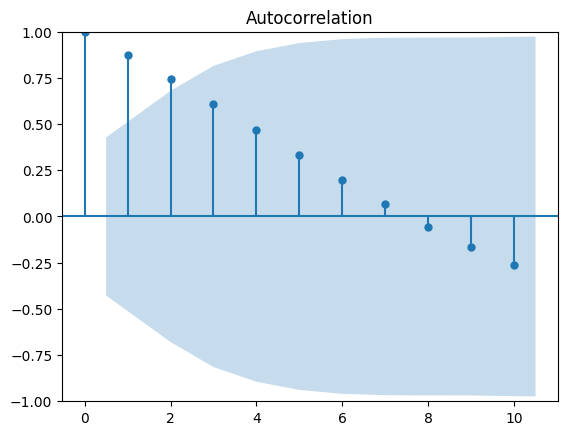

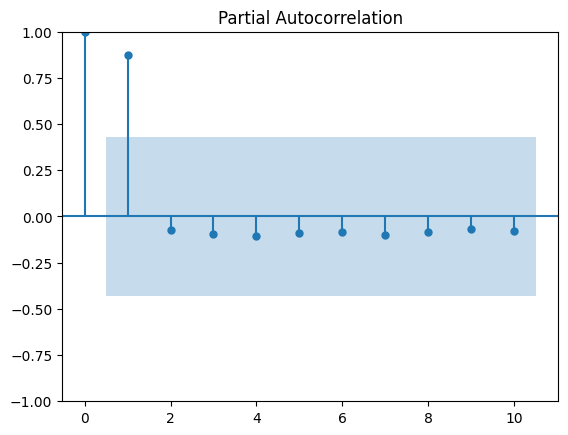

In [27]:
evaluate_assumptions(data)

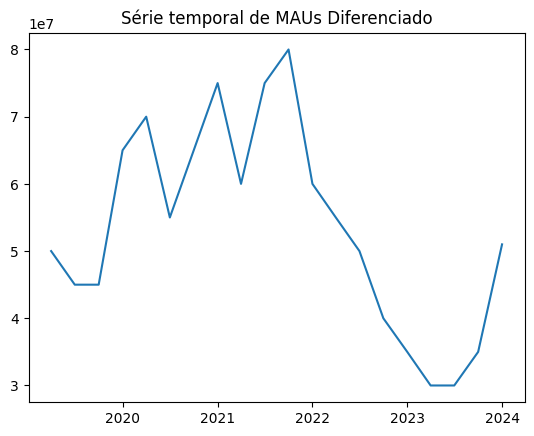

ADF Statistic (Diferenciado): -20.637285507623723
p-value (Diferenciado): 0.0
A série diferenciada é estacionária.


In [28]:
# Aplicando a primeira diferenciação
data['ig_maus_diff'] = data['ig_maus'].diff().dropna()

# Plotando a série diferenciada
plt.plot(data['quarter'], data['ig_maus_diff'], label='MAUs Diferenciado')
plt.title('Série temporal de MAUs Diferenciado')
plt.show()

# Reaplicando o Teste de Dickey-Fuller Aumentado (ADF) para a série diferenciada
adf_result_diff = adfuller(data['ig_maus_diff'].dropna())
print(f'ADF Statistic (Diferenciado): {adf_result_diff[0]}')
print(f'p-value (Diferenciado): {adf_result_diff[1]}')

if adf_result_diff[1] < 0.05:
    print('A série diferenciada é estacionária.')
else:
    print('A série diferenciada ainda não é estacionária. Considere mais diferenciação ou outras transformações.')


## Discussão/interpretação dos resultados MAUs
- correlação linear forte entre as variáveis MAUs e Receita. Apontando possível relação de causa e efeito entre as variáveis devido a MAUs ser um valor que pode ser considerado como um indicador de sucesso do aplicativo.
- apenas a variavel MAUs do instagram não é estacionária, já a MAUs do TikTok é estacionária. Destaque posterior analise dos trimestres 2 e 3 que parecem ser pontos de virada. 
- claras tendência positiva em ambas as variáveis MAUs. Porém a MAUs do TikTok nos ultimos periodos apresenta estabilidade, o que torna uma variável estacionária, apesar de poder aparentar uma tendência positiva constante.
- a série de receita apresenta um pouco de sazonalidade nos dados do Instagram, mas não é muito forte se comparada com as tendências.



## plano definido:
Prophet para MAUs e regressão linear para receita usando as previsões de MAUs ainda faz sentido. Aqui está a justificativa:

Justificativa:
Correlação linear forte entre MAUs e Receita:
Isso indica que o número de MAUs pode ser um bom preditor para as receitas. Usar as previsões de MAUs como feature para prever receitas é uma abordagem coerente.

Nenhuma das variáveis é estacionária:
Isso reforça o uso do Prophet, que é projetado para lidar com séries não estacionárias. No caso de MAUs, você pode seguir com Prophet sem necessidade de transformações.

Clara tendência positiva:
O Prophet modela bem a tendência (ele tem componentes de tendência embutidos no modelo). Já para a receita, a regressão linear é adequada quando existe uma relação linear clara entre as variáveis, como você observou.

Sazonalidade na receita é moderada:
Como a sazonalidade na receita é relativamente fraca comparada à tendência, a regressão linear pode ainda ser apropriada, especialmente se o foco principal for prever a tendência de crescimento da receita com base nos MAUs.

MAUs sem sazonalidade:
O fato de MAUs não apresentar sazonalidade torna a escolha por Prophet ainda mais válida, pois o Prophet pode captar bem a tendência sem complicações adicionais. Uma análise mais profunda de sazonalidade poderia ser feita, mas, por ora, é razoável seguir com o Prophet.

Veredicto:
Prophet para prever MAUs continua fazendo sentido, pois ele modela bem a tendência e lida com a não estacionariedade.
Regressão linear para prever receitas usando as previsões de MAUs também continua válida, dada a forte correlação linear entre as variáveis e a ausência de uma sazonalidade forte que pudesse exigir modelos mais complexos.

### Próximos Passos:
1. Modelar as previsões de MAUs com Prophet;
2. Usar as previsões de MAUs como feature para um modelo de regressão linear para prever as receitas.